In [63]:
import math
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
import cvxopt as opt 
from cvxopt import blas, solvers
import seaborn as sns 
from pandas.plotting import scatter_matrix
%matplotlib inline

aapl = yf.Ticker('AAPL')

print(aapl)
aapl_history_max = aapl.history(period='1mo')
aapl_history_max['Open']


yfinance.Ticker object <AAPL>


Date
2024-07-08 00:00:00-04:00    227.089996
2024-07-09 00:00:00-04:00    227.929993
2024-07-10 00:00:00-04:00    229.300003
2024-07-11 00:00:00-04:00    231.389999
2024-07-12 00:00:00-04:00    228.919998
2024-07-15 00:00:00-04:00    236.479996
2024-07-16 00:00:00-04:00    235.000000
2024-07-17 00:00:00-04:00    229.449997
2024-07-18 00:00:00-04:00    230.279999
2024-07-19 00:00:00-04:00    224.820007
2024-07-22 00:00:00-04:00    227.009995
2024-07-23 00:00:00-04:00    224.369995
2024-07-24 00:00:00-04:00    224.000000
2024-07-25 00:00:00-04:00    218.929993
2024-07-26 00:00:00-04:00    218.699997
2024-07-29 00:00:00-04:00    216.960007
2024-07-30 00:00:00-04:00    219.190002
2024-07-31 00:00:00-04:00    221.440002
2024-08-01 00:00:00-04:00    224.369995
2024-08-02 00:00:00-04:00    219.149994
2024-08-05 00:00:00-04:00    199.089996
2024-08-06 00:00:00-04:00    205.300003
Name: Open, dtype: float64

Max value:    nan
Min value:    nan
Rang:         nan
1st quantile: nan
3rd quantile: nan
IQR:          nan
Outliner high nan
Outliner low  nan


Text(0.5, 0, 'PFE')

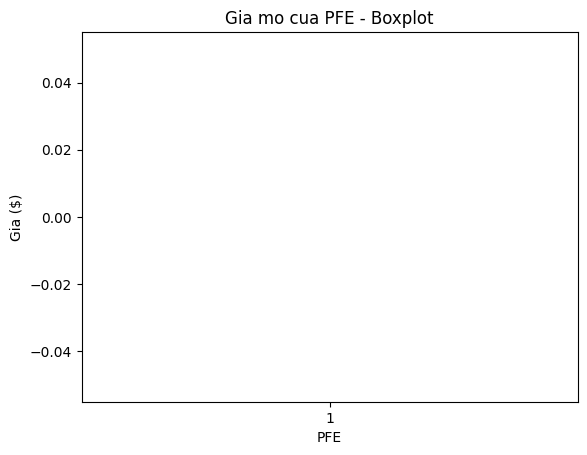

In [22]:
PFE_max = df_PFE['Open'].max()
PFE_min = df_PFE['Open'].min()
range_returns = PFE_max - PFE_min
PFE_Q1 = df_PFE['Open'].quantile(.25)
PFE_Q3 = df_PFE['Open'].quantile(.75)
PFE_IQR = PFE_Q3 - PFE_Q1 
PFE_outliner_high = PFE_Q3 + 1.5*PFE_IQR
PFE_outliner_low = PFE_Q1 - 1.5*PFE_IQR

print('Max value:    %.3f' %PFE_max)
print('Min value:    %.3f' %PFE_min)
print('Rang:         %.3f' %range_returns)
print('1st quantile: %.3f' %PFE_Q1)
print('3rd quantile: %.3f' %PFE_Q3)
print('IQR:          %.3f' %PFE_IQR)
print('Outliner high %.3f' %PFE_outliner_high)
print('Outliner low  %.3f' %PFE_outliner_low)

plt.boxplot(df_PFE['Open'])                                                                                                      #, df_AVGO['Open'], df_PFE['Open']])
plt.title('Gia mo cua PFE - Boxplot')
plt.ylabel('Gia (\$)')
plt.xlabel('PFE')

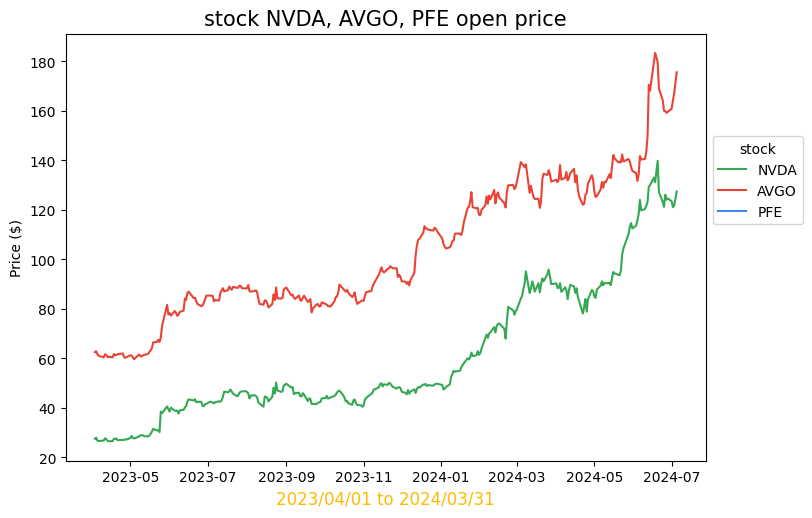

In [23]:
fig, ax = plt.subplots()

x1 = ax.plot(df_NVDA['Date'], df_NVDA['Open'],color='#34a853', label='NVDA')
x2 = ax.plot(df_AVGO['Date'], df_AVGO['Open'], color='#ea4335', label='AVGO')
x3 = ax.plot(df_PFE['Date'], df_PFE['Open'], color ='#4285f4', label='PFE')
plt.title('stock NVDA, AVGO, PFE open price', fontsize=15)
plt.ylabel('Price (\$)')
plt.xlabel('2023/04/01 to 2024/03/31', color='#fbbc04', fontsize = 12)
plt.subplots_adjust(left=0.1, right=1.1, top=1)
ax.legend(title = 'stock',  bbox_to_anchor=(1.1, 0.8), bbox_transform=plt.gcf().transFigure)

array([[<Axes: xlabel='NVIDIA', ylabel='NVIDIA'>,
        <Axes: xlabel='Broadcom', ylabel='NVIDIA'>,
        <Axes: xlabel='Pfizer', ylabel='NVIDIA'>],
       [<Axes: xlabel='NVIDIA', ylabel='Broadcom'>,
        <Axes: xlabel='Broadcom', ylabel='Broadcom'>,
        <Axes: xlabel='Pfizer', ylabel='Broadcom'>],
       [<Axes: xlabel='NVIDIA', ylabel='Pfizer'>,
        <Axes: xlabel='Broadcom', ylabel='Pfizer'>,
        <Axes: xlabel='Pfizer', ylabel='Pfizer'>]], dtype=object)

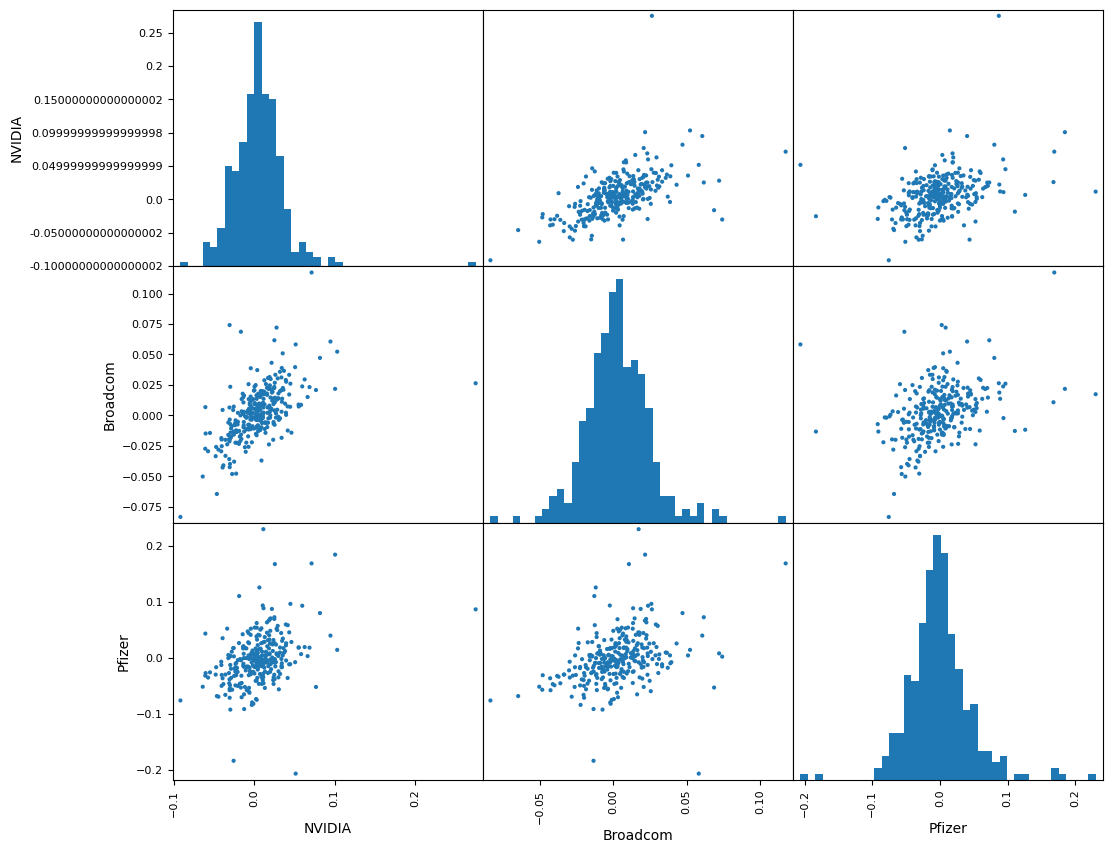

In [20]:
df_NVDA['Returns'] = df_NVDA['Open'].pct_change(1)
df_NVDA['Returns'] = df_NVDA['Returns'].dropna()

df_AVGO['Returns'] = df_AVGO['Open'].pct_change(1)
df_AVGO['Returns'] = df_AVGO['Returns'].dropna()

df_PFE['Returns'] = df_PFE['Open'].pct_change(1)
df_PFE['Returns'] = df_PFE['Returns'].dropna()

NVDA_AVGO_PFE = pd.concat([df_NVDA['Returns'], df_AVGO['Returns'], df_PFE['Returns']], axis=1)
                                                                                                                                  # NVDA_AVGO = NVDA_AVGO.to_frame()
NVDA_AVGO_PFE.columns = ['NVIDIA', 'Broadcom', 'Pfizer']
                                                                                                                                  # sns.pairplot(NVDA_AVGO, figsize=(12,10), alpha = 1.0, hist_kwds={'bin':40})
scatter_matrix(NVDA_AVGO_PFE,alpha=1.0,figsize=(12,10), hist_kwds={'bins':40})

In [ ]:
correlation = NVDA_AVGO_PFE.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap=None, linewidths=0.3, annot_kws={"size":20});

In [ ]:
NVDA_array = np.array(df_NVDA['Open'])
AVGO_array = np.array(df_AVGO['Open'])
PFE_array = np.array(df_PFE['Open'])

def pct_change(anarray):
    return (np.diff(anarray)/anarray[:-1]).round(7)

NVDA_array = pct_change(NVDA_array)
AVGO_array = pct_change(AVGO_array)
PFE_array = pct_change(PFE_array)


NVDA_AVGO_PFE_a = np.vstack((NVDA_array, AVGO_array, PFE_array))
NVDA_AVGO_PFE_a.T
fig = plt.figure()
plt.plot(NVDA_AVGO_PFE_a.T, alpha = .4)
plt.xlabel('time')
plt.ylabel('return')

In [ ]:
def rand_weights(n):
    k = np.random.rand(n)
    return k / sum(k)

def random_portfolio(returns):
    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    c = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * c * w.T)
    
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma
n_portfolios = 1500
means, stds = np.column_stack([random_portfolio(NVDA_AVGO_PFE_a)
                              for _ in range(n_portfolios)])

def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    G = -opt.matrix(np.eye(n))
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus]
    
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks
    
weights, returns, risks = optimal_portfolio(NVDA_AVGO_PFE_a)

fig = plt.figure()
plt.plot(stds, means, 'o', markersize = 5)
plt.plot(risks, returns,  'g-o', markersize = 5, label=' opt trace')
plt.xlabel('risk')
plt.ylabel('returns')
plt.legend()
plt.title('Biểu đồ và đường tối ưu Markowitz')